<a href="https://colab.research.google.com/github/Sunjeisme/class_ai4dl/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# 1-1
model = get_model()
history_original = model.fit(
    train_images, train_labels,   # original data
    epochs=10,
    batch_size=128,
    validation_split=0.2)

**Plotting a validation accuracy comparison**

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]     # 1-2

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",                       # 1-2
         label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)
# 1-2
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 582.0271 - accuracy: 0.3236 - val_loss: 2.2432 - val_accuracy: 0.2464
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.6345 - accuracy: 0.2194 - val_loss: 2.2003 - val_accuracy: 0.2156
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6996 - accuracy: 0.2108 - val_loss: 2.1214 - val_accuracy: 0.2331
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7335 - accuracy: 0.1801 - val_loss: 2.4474 - val_accuracy: 0.1928
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5156 - accuracy: 0.1935 - val_loss: 2.4704 - val_accuracy: 0.1639
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5516 - accuracy: 0.2211 - val_loss: 2.1685 - val_accuracy: 0.2058
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5600 - accuracy: 0.1911 - val_loss: 2.3534 - val_accuracy: 0.2424
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3242 - accuracy: 0.9137 - val_loss: 0.1615 - val_accuracy: 0.9559
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1271 - accuracy: 0.9640 - val_loss: 0.1519 - val_accuracy: 0.9597
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9753 - val_loss: 0.1417 - val_accuracy: 0.9668
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9796 - val_loss: 0.1527 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9822 - val_loss: 0.1885 - val_accuracy: 0.9688
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0601 - accuracy: 0.9857 - val_loss: 0.2148 - val_accuracy: 0.9667
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9874 - val_loss: 0.1806 - val_accuracy: 0.9739
Epoch 

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.2952 - accuracy: 0.9159 - val_loss: 0.1476 - val_accuracy: 0.9602
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1228 - accuracy: 0.9642 - val_loss: 0.1087 - val_accuracy: 0.9682
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9770 - val_loss: 0.0940 - val_accuracy: 0.9721
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9828 - val_loss: 0.0810 - val_accuracy: 0.9758
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.9875 - val_loss: 0.0759 - val_accuracy: 0.9779
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.0709 - val_accuracy: 0.9790
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.0761 - val_accuracy: 0.9787
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

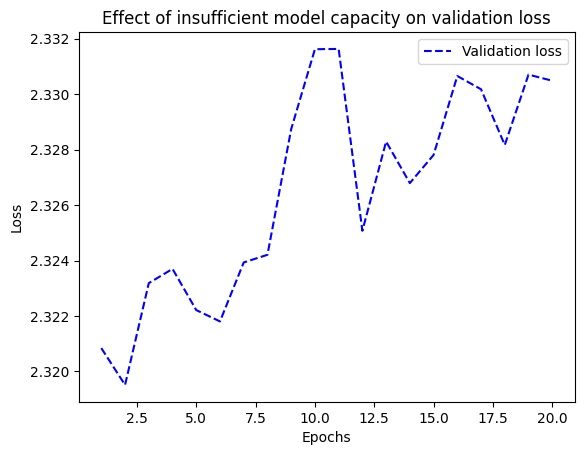

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# 2-2
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_low_capacity = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3088 - accuracy: 0.1038 - val_loss: 2.3022 - val_accuracy: 0.1115
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3039 - val_accuracy: 0.1110
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2981 - accuracy: 0.1154 - val_loss: 2.3084 - val_accuracy: 0.1067
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2937 - accuracy: 0.1223 - val_loss: 2.3108 - val_accuracy: 0.1048
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2894 - accuracy: 0.1250 - val_loss: 2.3132 - val_accuracy: 0.1066
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2838 - accuracy: 0.1307 - val_loss: 2.3191 - val_accuracy: 0.1052
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2778 - accuracy: 0.1371 - val_loss: 2.3216 - val_accuracy: 0.1011
Epoch 

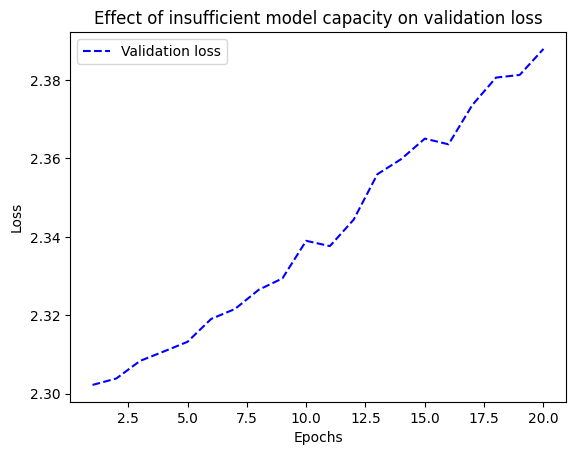

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_low_capacity.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary